importing what is required
reading the csv file

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("data.csv")

Checking the shape and size of dataframe

In [8]:
print(df.shape)
print(df.size)
nrows = df.shape[0]
ncols = df.shape[1]

(327, 19)
6213


The dataframe itself

In [9]:
df

,S.No,EmpID,Emp Name,DOJ,Designation,Grade,Attrition,Location,In Active Date,Tenure,Gender,Education,Age,Last Rating,Monthly Income,Engagement Score (% Satisfaction),Marital Status,Zone,Remarks
0,1,XYZ2685,ABC1,22-Nov-10,Sales Executive,E1,Yes,Bhavnagar,26-May-12,1. 6,Female,Bachelors,27,4,25535,2%,Divorced,West,Issues with the Manager
1,2,XYZ2490,ABC2,5-Jul-10,Technical Services Officer,M2,Yes,Jayanagar,6-Apr-12,1. 9,Male,MBA,36,2,52155,45%,Single,South,More Challenging Job Roles/ Higher designation
2,3,XYZ2662,ABC3,20-Oct-10,Sales Executive,E1,Yes,Indore,7-Apr-12,1. 5,Male,Bachelors,24,4,26438,18%,Divorced,CENTRAL,Issues with the Manager
3,4,XYZ1679,ABC4,1 May 08,AM - Sales,M1,Yes,Admin Gujarat,3 Apr 12,3 .11,Male,Bachelors,33,2,54311,82%,Single,West,Lack of Growth
4,5,XYZ2378,ABC5,3 Mar 10,Sales Executive,E1,Yes,Jagdishpuram,10 Apr 12,2 .1,Male,Bachelors,24,4,26702,49%,Divorced,North,Issues with the Manager
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,323,XYZ1538,ABC323,26-May-08,AM - Sales,M1,Yes,Guntur,15 Mar 13,4 .9,Male,Bachelors,37,2,53841,69%,Divorced,South,Lack of Growth
323,324,XYZ3221,ABC324,13-Sep-12,Sales Executive,E1,Yes,Guntur,7 Mar 13,0. 5,Male,Bachelors,25,3,25813,11%,Married,South,Lack of Growth
324,325,XYZ0207,ABC325,12-Dec-05,Sr Sales Executive,E2,Yes,Guntur,12 Mar 13,7 .3,Male,Bachelors,28,1,36498,11%,Divorced,South,Lack of Growth
325,326,XYZ0183,ABC326,21-Jul-04,AM - Sales,M1,Yes,Guntur,31 Mar 13,8 .8,Male,Bachelors,36,3,51796,82%,Divorced,South,Termination - Poor Performance


Firstly, I plan to see the different designations of people leaving and their numbers

In [10]:
designations=df["Designation"].unique()
print("designations",designations,"\n", "count:", len(designations))

designations ['Sales Executive' 'Technical Services Officer' 'AM - Sales'
 'Sales Executive ' 'Sr Sales Executive' 'Sr Sales Executive '
 ' Sales Executive' 'Regional Manager' 'Zonal Manager'
 'National Sales Head'] 
 count: 10


So observing these unique values there are some duplicates because of the space at end of some of them
eg. 'Sr Sales Executive' and 'Sr Sales Executive '
So to remove these

In [11]:
for index, row in df.iterrows():
  for i in range(ncols):
    if type(df.iloc[index,i])==str:
      df.iloc[index,i] = df.iloc[index,i].strip()

In [12]:
designations=df["Designation"].unique()
print("designations",designations,"\n", "count:", designations.shape[0])

designations ['Sales Executive' 'Technical Services Officer' 'AM - Sales'
 'Sr Sales Executive' 'Regional Manager' 'Zonal Manager'
 'National Sales Head'] 
 count: 7


Done!

Now on to plot these numbers

[235, 27, 22, 34, 5, 3, 1]


<Figure size 11520x11520 with 0 Axes>

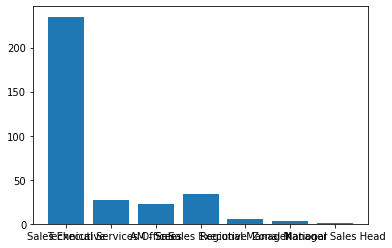

<Figure size 11520x11520 with 0 Axes>

In [13]:
desgcount = []
for i in range(designations.shape[0]):
    desgcount.append(df[df["Designation"]==designations[i]].shape[0])
print(desgcount)

plt.bar(designations,desgcount)
plt.figure(figsize = (160,160))


With this graph we can see the employees's designations who have left and this information can be used to further inspect in the company.
We can do the same thing for the locations

In [14]:
df = df.astype({"Location":str})
for index in range(nrows):
    df.iloc[index,7] = df.iloc[index,7].lower()


In [15]:

locations=df["Location"].unique()
locscount = []
for i in range(locations.shape[0]):
    locscount.append(df[df["Location"]==locations[i]].shape[0])
print(locations,locscount)


['bhavnagar' 'jayanagar' 'indore' 'admin gujarat' 'jagdishpuram' 'lalganj'
 'trombay' 'sinahagad' 'vasai' 'kozhikode' 'haridwar' 'madurai' 'jammu'
 'dehradun' 'hinoo' 'balasore' 'bilaspur' 'pune' 'gurukul' 'zo kolkata'
 'jagatpur' 'admin maharastra' 'patiala' 'nasik' 'trivandrum' 'dumdum'
 'bally' 'cuttack' 'vellore' 'vyara' 'zo mumbai' 'rohini' 'ho hyderabad'
 'varanasi' 'nan' 'koyambedu' 'madurai (thallakulam)' 'siliguri' 'kanpur'
 'lalpur' 'raipur' 'velachery' 'najafgarh' 'sultanpur' 'gurubuxganj'
 'shimla' 'anand (ext vadodara)' 'shahpura' 'gondal' 'sonipat'
 'admin delhi' 'tilak vihar' 'jagdispuram' 'magadi road' 'zo delhi'
 'kalyan' 'loni' 'kolkata' 'jhansi' 'kolkatta' 'allahabad' 'mandi'
 'haldwani' 'unchahar' 'lambhua' 'hadapsar' 'devenahalli' 'trichy'
 'mukundpur' 'rajamundry' 'ameethi' 'ahmedabad' 'kalewadi' 'mithapur'
 'udaipur' 'hanuman nagar' 'indrapuri' 'kangra' 'kashidih' 'orissa'
 'bhopal indrapuri' 'jabalpur alok nagar' 'ho' 'durg' 'bangalore' 'behala'
 'bachrawan' 'vi

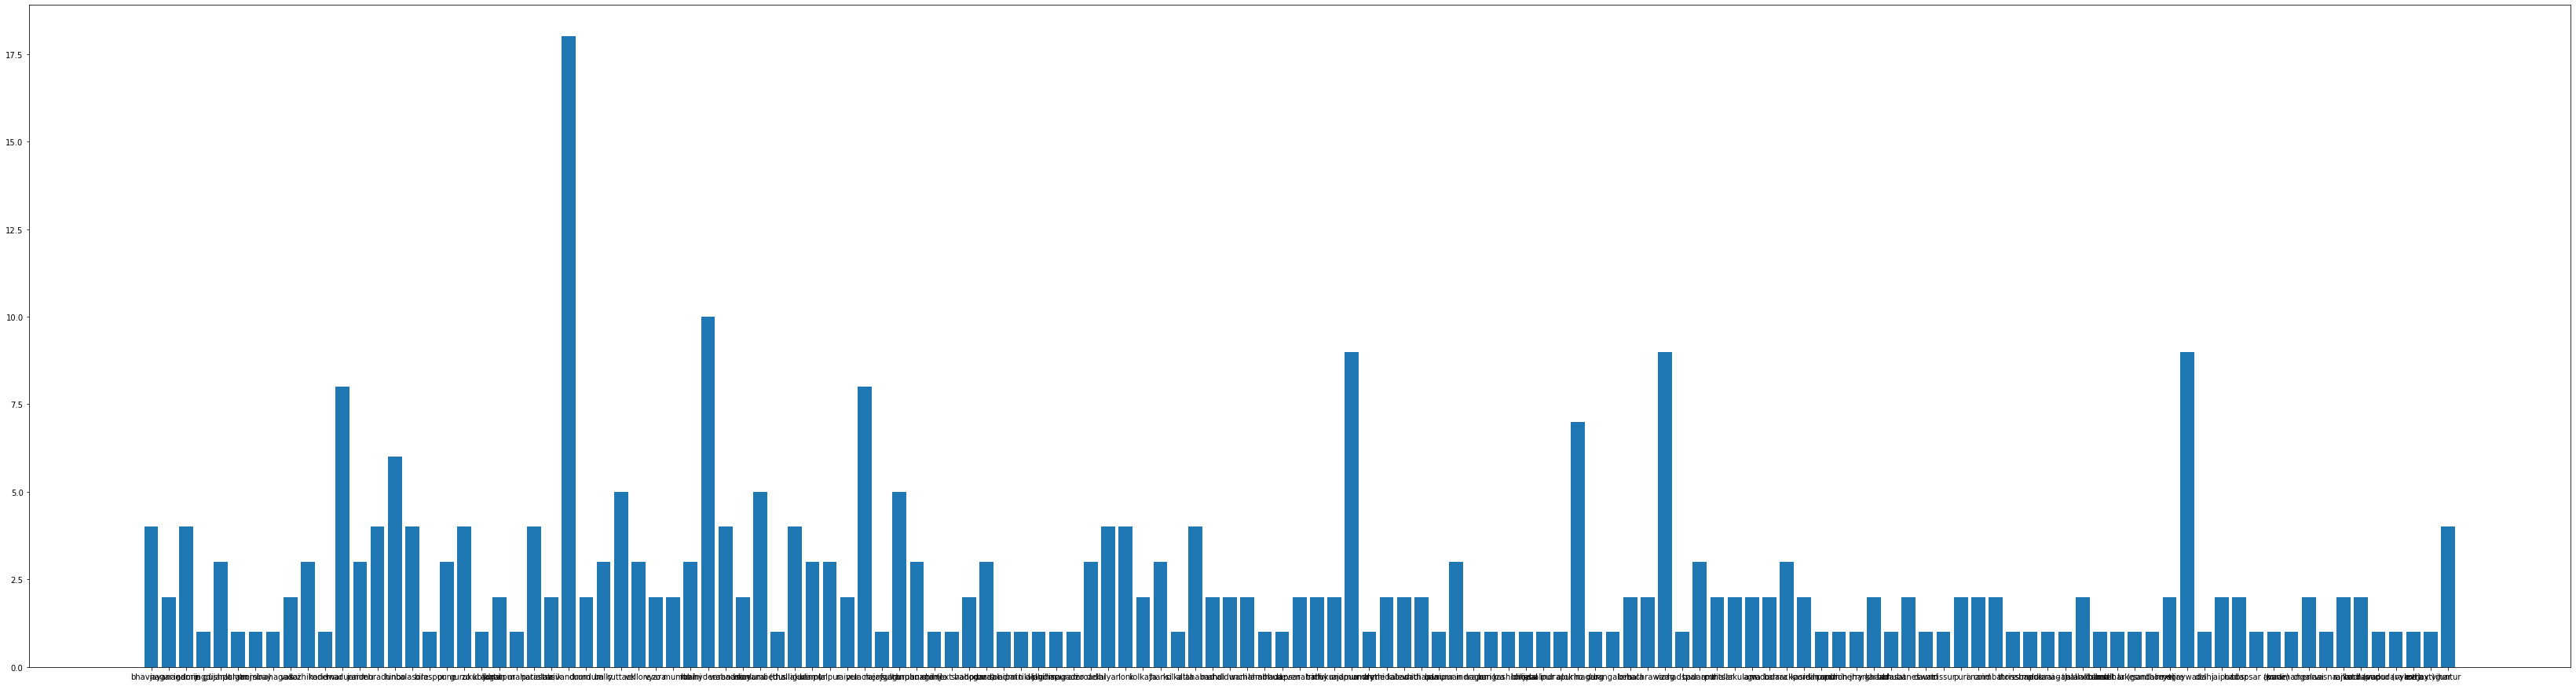

In [18]:
plt.bar(locations,locscount)
# plt.figure(figsize = (160,160))
plt.rcParams["figure.figsize"] = (58,15.5)